# Gamma Project

Data Set Information:

The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

Typically, the image of a shower after some pre-processing is an elongated cluster. Its long axis is oriented towards the camera center if the shower axis is parallel to the telescope's optical axis, i.e. if the telescope axis is directed towards a point source. A principal component analysis is performed in the camera plane, which results in a correlation axis and defines an ellipse. If the depositions were distributed as a bivariate Gaussian, this would be an equidensity ellipse. The characteristic parameters of this ellipse (often called Hillas parameters) are among the image parameters that can be used for discrimination. The energy depositions are typically asymmetric along the major axis, and this asymmetry can also be used in discrimination. There are, in addition, further discriminating characteristics, like the extent of the cluster in the image plane, or the total sum of depositions.

The data set was generated by a Monte Carlo program, Corsika, described in:
D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
Forschungszentrum Karlsruhe FZKA 6019 (1998).
[Web Link]

The program was run with parameters allowing to observe events with energies down to below 50 GeV.


Attribute Information:

1. fLength: continuous # major axis of ellipse [mm]
2. fWidth: continuous # minor axis of ellipse [mm]
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot]
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
5. fConc1: continuous # ratio of highest pixel over fSize [ratio]
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
7. fM3Long: continuous # 3rd root of third moment along major axis [mm]
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
9. fAlpha: continuous # angle of major axis with vector to origin [deg]
10. fDist: continuous # distance from origin to center of ellipse [mm]
11. class: g,h # gamma (signal), hadron (background)

g = gamma (signal): 12332
h = hadron (background): 6688

For technical reasons, the number of h events is underestimated. In the real data, the h class represents the majority of the events.

The simple classification accuracy is not meaningful for this data, since classifying a background event as signal is worse than classifying a signal event as background. For comparison of different classifiers an ROC curve has to be used. The relevant points on this curve are those, where the probability of accepting a background event as signal is below one of the following thresholds: 0.01, 0.02, 0.05, 0.1, 0.2 depending on the required quality of the sample of the accepted events for different experiments.



In [9]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#column names to rename dataframe
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']

In [11]:
#Load dataset
df = pd.read_csv('magic04.data', names = cols)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [12]:
#since we are doing a binary model 
# covert the class column to 1 and o
df['class']=(df['class']=='g').astype(int)

In [13]:
#check correlation 
df.corr()['class'].sort_values()

fAlpha     -0.460979
fLength    -0.307572
fWidth     -0.265596
fSize      -0.117795
fDist      -0.065203
fM3Trans   -0.003837
fConc1      0.004797
fConc       0.024615
fAsym       0.173587
fM3Long     0.193409
class       1.000000
Name: class, dtype: float64

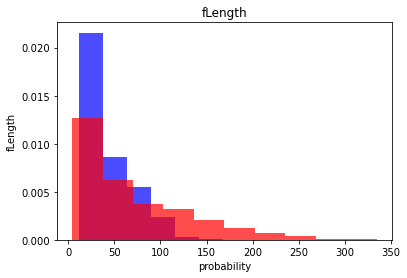

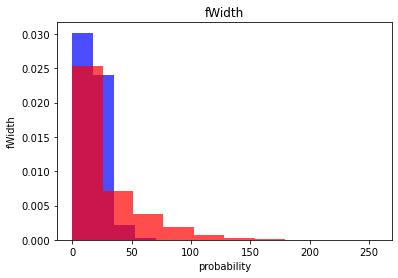

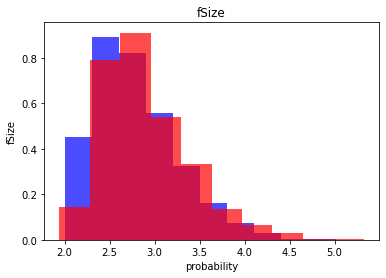

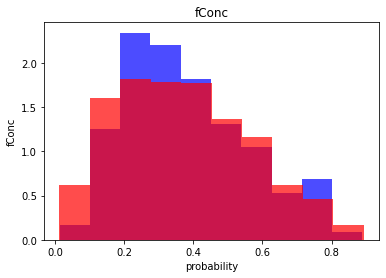

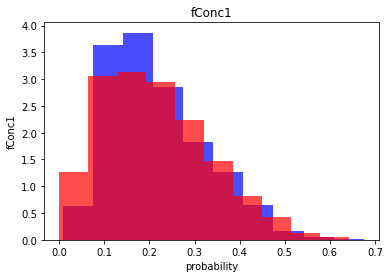

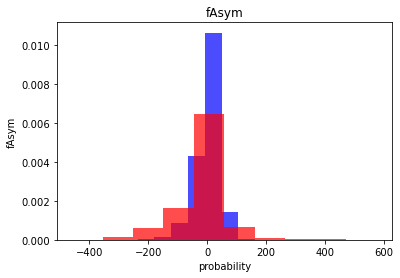

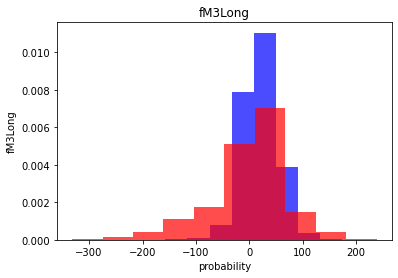

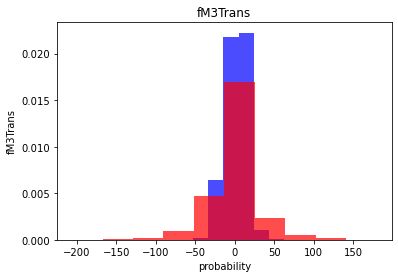

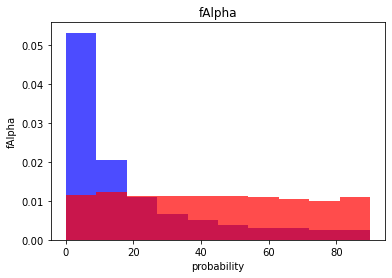

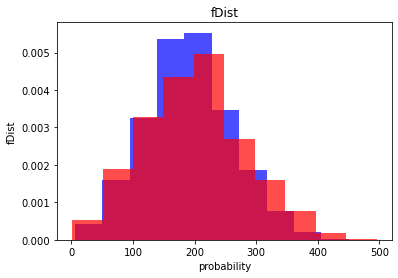

In [14]:
#plot the data in a histplot 
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label], color='red', label='gamma', alpha=0.7,density=True)
    plt.title(label)
    plt.xlabel('probability')
    plt.ylabel(label)
    plt.legend
    plt.show()

# prepare the data 
### xtrain, validate, test 

In [15]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [16]:
#standardize and scale 
#create a fuction for the whole dataframe to be standardized 
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
  
  #resample to match the length

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)

  #whole data as 2d numpy hstack
    data = np.hstack((x,np.reshape(y, (-1, 1))))

    return data,x,y

In [17]:
#oversample the data on y axis 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 
train, X_train, y_train = scale_dataset(train, oversample=True )

In [18]:
#they are now equal lengths 
sum(y_train==1)

7417

In [19]:
#now do the same for validate and test but dont resample
valid, X_valid, y_valid = scale_dataset(valid, oversample=False )
test, X_test, y_test = scale_dataset(test, oversample=False )

In [20]:
df.head()
X = df.drop(['class'], axis=1)
y = df['class']

In [21]:
#split train test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [22]:
#check the shape of the splits 
X_train.shape, y_train.shape

((15216, 10), (15216,))

In [23]:
#scale
stand= StandardScaler()
Fit_Transform = stand.fit_transform(X_train)

### KNN model 

In [24]:
from sklearn.neighbors import KNeighborsClassifier
#metrics classification 
from sklearn.metrics import classification_report 

In [25]:
#model 
knn_model = KNeighborsClassifier(n_neighbors =5)
#fit
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
#get predictions using x test 
y_pred = knn_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [27]:
#metrics  classiffication report  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.61      0.70      1344
           1       0.81      0.93      0.87      2460

    accuracy                           0.82      3804
   macro avg       0.82      0.77      0.79      3804
weighted avg       0.82      0.82      0.81      3804



In [28]:
#accuraccy 82 %
#precision how many are trues did our model get right
#recall outoff all positive on training how many did we get right from data

# Naive Bayes Model 

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
#model 
nb_model = GaussianNB()
#fit model
nb_model = nb_model.fit(X_train, y_train)

In [31]:
#prediction
yn_pred = nb_model.predict(X_test)
yn_pred

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
#classification report
print(classification_report(y_test, yn_pred))

              precision    recall  f1-score   support

           0       0.71      0.38      0.49      1344
           1       0.73      0.92      0.81      2460

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.65      3804
weighted avg       0.72      0.73      0.70      3804



>> accuracy look worse 

## Logistic regression 

In [33]:
#import library
from sklearn.linear_model import LogisticRegression

In [34]:
#model 
lr_model = LogisticRegression()
#fit 
lr_model =lr_model.fit(X_train, y_train)

C:\Users\lenovo\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
#predict 
lr_pred = lr_model.predict(X_test)

In [36]:
#classify metric
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.75      0.59      0.66      1344
           1       0.80      0.89      0.84      2460

    accuracy                           0.79      3804
   macro avg       0.78      0.74      0.75      3804
weighted avg       0.78      0.79      0.78      3804



In [37]:
# Supper Vector Machine (SVM)
##### not best if we had outliers 

In [38]:
from sklearn.svm import  SVC
#support vector classifier

In [39]:
#model 
svc_model = SVC()
#fit 
svc_model =svc_model.fit(X_train, y_train)

In [40]:
#predict
svc_pred = svc_model.predict(X_test)

In [41]:
#classify metric
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.88      0.59      0.71      1344
           1       0.81      0.96      0.88      2460

    accuracy                           0.83      3804
   macro avg       0.85      0.77      0.79      3804
weighted avg       0.84      0.83      0.82      3804



>> wow has really done well

# Neural Network for classification using tensor flow

In [42]:
import tensorflow as tf

In [43]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
                          
])

In [44]:
#optimizer 
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics =['accuracy'])

>>> this was not the best 

# Linear Regression

In [73]:
#line of best fit
df.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

In [76]:
#generate variables 
X = df[['fLength','fWidth','fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long','fM3Trans', 'fAlpha','fDist']]
y = df['class']

In [53]:
df.corr()['class'].sort_values()

fAlpha     -0.460979
fLength    -0.307572
fWidth     -0.265596
fSize      -0.117795
fDist      -0.065203
fM3Trans   -0.003837
fConc1      0.004797
fConc       0.024615
fAsym       0.173587
fM3Long     0.193409
class       1.000000
Name: class, dtype: float64

In [82]:
#traintest 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
#model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
#fit model
lr_model.fit(X_train, y_train)

LinearRegression()

In [84]:
X_test

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
18749,48.0573,11.0862,2.9571,0.3620,0.1882,0.4200,32.4358,-2.2992,26.9300,165.2240
7051,23.4858,0.0000,2.2393,0.7378,0.3775,-2.9397,13.0915,0.0001,19.3410,235.3420
10901,40.5429,19.4073,3.3382,0.2369,0.1269,29.1908,27.0567,-7.1243,10.0643,195.6030
15858,16.6123,7.8423,2.5572,0.5829,0.3371,6.7271,-10.3448,-2.3240,14.5111,214.2655
17968,205.4250,37.7936,3.2727,0.2167,0.1257,46.0952,-210.9350,-29.7478,60.0580,206.1730
...,...,...,...,...,...,...,...,...,...,...
8138,12.9935,11.0298,2.3149,0.7506,0.4479,-14.2100,6.4590,-9.7896,50.9220,48.6180
10263,44.8332,10.5008,2.7067,0.4656,0.2485,3.4712,-34.5551,7.9535,4.9965,185.9660
3289,29.1486,16.3655,2.7756,0.3755,0.2054,-9.5722,-19.5828,11.0002,15.2554,116.6320
9384,27.5346,17.1474,2.6637,0.3384,0.1746,-6.5985,18.9573,12.9865,2.5393,99.1698
